In [15]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


'Colab Notebooks'   Datasets


In [14]:
def analyze_dataset(dataset_path, dataset_name):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

    image_files = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))

    # Detect classes (folder-based)
    class_names = [
        d for d in os.listdir(dataset_path)
        if os.path.isdir(os.path.join(dataset_path, d))
    ]

    class_counts = {}
    for cls in class_names:
        class_dir = os.path.join(dataset_path, cls)
        class_counts[cls] = sum(
            1 for f in os.listdir(class_dir)
            if f.lower().endswith(image_extensions)
        )

    # Sample resolutions
    resolutions = []
    corrupt = 0
    for img_path in image_files[:200]:
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)
        except:
            corrupt += 1

    # Imbalance ratio
    imbalance_ratio = None
    if len(class_counts) > 1:
        imbalance_ratio = max(class_counts.values()) / min(class_counts.values())

    # Summary dictionary
    summary = {
        "Dataset": dataset_name,
        "Total Images": len(image_files),
        "Classes": class_names,
        "Images per Class": class_counts,
        "Imbalance Ratio": imbalance_ratio,
        "Sample Resolutions": list(set(resolutions))[:5],
        "Corrupt Images": corrupt,
        "Challenges": [
            "Class imbalance" if imbalance_ratio and imbalance_ratio > 2 else "Balanced classes",
            "Resolution variation" if len(set(resolutions)) > 1 else "Uniform resolution",
            "Possible label noise"
        ]
    }

    # Visualization
    plt.figure()
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xticks(rotation=45)
    plt.title(f"Class Distribution – {dataset_name}")
    plt.ylabel("Number of Images")
    plt.show()

    return summary

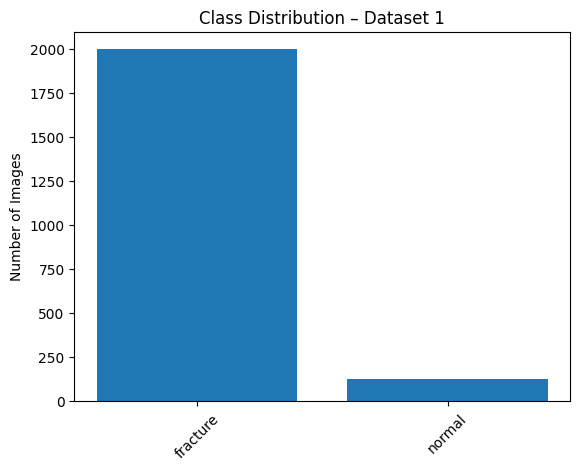

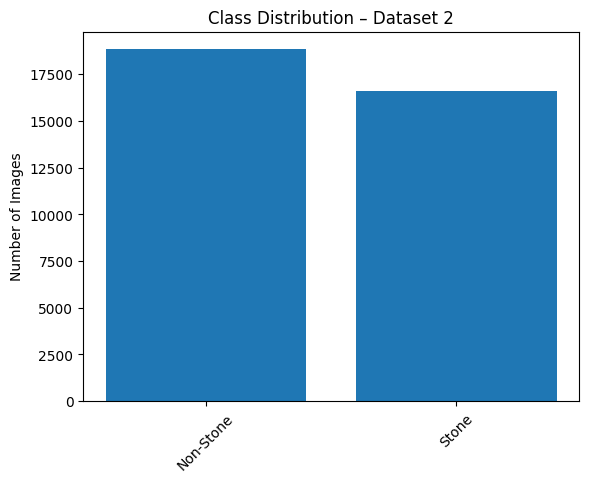

In [22]:
dataset1_path = "/content/drive/MyDrive/Datasets/bone_fracture/Bone fracture dataset/Bone fracture dataset/Dataset"
dataset2_path = "/content/drive/MyDrive/Datasets/kidney_stone_ct/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Kindy Stone Dataset/Augmented Dataset"
summary1 = analyze_dataset(dataset1_path, "Dataset 1")
summary2 = analyze_dataset(dataset2_path, "Dataset 2")

In [23]:
def print_summary(summary):
    print("\n📌", summary["Dataset"])
    print("-" * 40)
    print("Total images:", summary["Total Images"])
    print("Classes:", summary["Classes"])
    print("Images per class:", summary["Images per Class"])
    print("Imbalance ratio:", summary["Imbalance Ratio"])
    print("Sample resolutions:", summary["Sample Resolutions"])
    print("Corrupt images:", summary["Corrupt Images"])
    print("Challenges:")
    for c in summary["Challenges"]:
        print(" -", c)

print_summary(summary1)
print_summary(summary2)


📌 Dataset 1
----------------------------------------
Total images: 2127
Classes: ['fracture', 'normal']
Images per class: {'fracture': 2000, 'normal': 127}
Imbalance ratio: 15.748031496062993
Sample resolutions: [(700, 700), (224, 224)]
Corrupt images: 0
Challenges:
 - Class imbalance
 - Resolution variation
 - Possible label noise

📌 Dataset 2
----------------------------------------
Total images: 35457
Classes: ['Non-Stone', 'Stone']
Images per class: {'Non-Stone': 18840, 'Stone': 16617}
Imbalance ratio: 1.1337786604080158
Sample resolutions: [(512, 512)]
Corrupt images: 0
Challenges:
 - Balanced classes
 - Uniform resolution
 - Possible label noise
